In [24]:
set timefmt "%y-%d-%m"
set ydata time
set yrange ["2018-08-05":"2019-07-28"]
set datafile sep ','
plot "minecraft.csv" 

#plot "my data.csv" using 1:2

plot "minecraft.csv" 
                     ^
Need using spec for y time data




An unknown error occured. Failed to read and display image file from gnuplot.


In [29]:
set ydata time
set timefmt "%y/%m/%d"
set yrange ["2018-08-05":"2019-07-28"]
set format y "%m/%d"
set timefmt "%y/%m/%d %H:%M"
set datafile separator ","
plot "minecraft.csv" using 1:3

An unknown error occured. Failed to read and display image file from gnuplot.


         Can't plot with an empty y range!



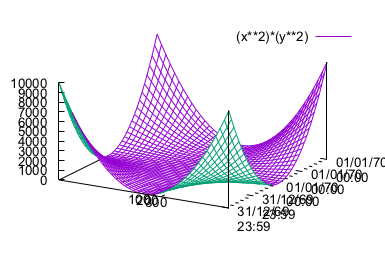

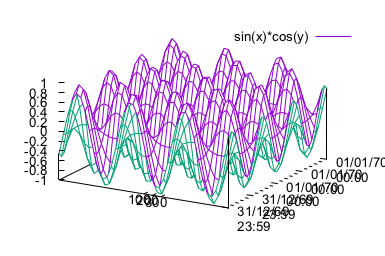

In [21]:
set ticslevel 0
splot (x**2)*(y**2)
set hidden3d
set isosample 40
splot sin(x)*cos(y)

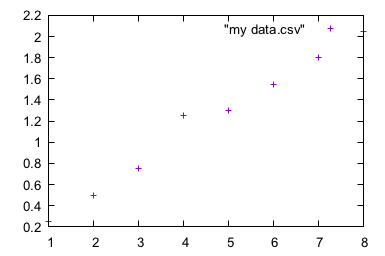

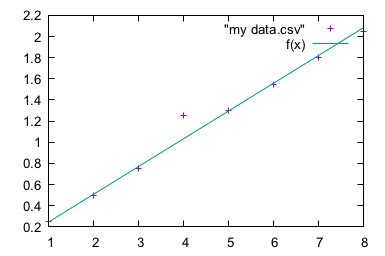

	> Implied independent variable y not found in fit function.
	> Assuming version 4 syntax with zerror in column 3 but no zerror keyword.

iter      chisq       delta/lim  lambda   m             b            
   0 1.2539454686e+00   0.00e+00  5.83e+00    2.620444e-01  -1.518554e-02
   1 1.2539454686e+00  -3.54e-11  5.83e-01    2.620444e-01  -1.518554e-02
iter      chisq       delta/lim  lambda   m             b            

After 1 iterations the fit converged.
final sum of squares of residuals : 1.25395
rel. change during last iteration : -3.54154e-16

degrees of freedom    (FIT_NDF)                        : 6
rms of residuals      (FIT_STDFIT) = sqrt(WSSR/ndf)    : 0.457155
variance of residuals (reduced chisquare) = WSSR/ndf   : 0.208991
p-value of the Chisq distribution (FIT_P)              : 0.974136

Final set of parameters            Asymptotic Standard Error
=======================            ==========================
m               = 0.262044         +/- 0.008905     (3.398%)

In [9]:
plot "my data.csv"
f(x)=m*x + b
fit f(x) "my data.csv" using 1:2:3 via m,b
replot f(x)

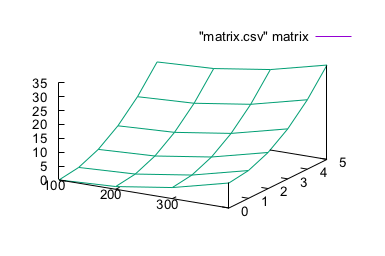

In [13]:
set xtics ("100" 0, "200" 1, "300" 2)
splot "matrix.csv" matrix with lines

In [ ]:
if (!exists("VoxelDistance")) exit

set border 0
set xzeroaxis; set yzeroaxis; set zzeroaxis;
set label 1 "X" at 4.1, 0, 0
set label 2 "Y" at 0, 4.1, 0
set label 3 "Z" at 0, 0, 4.1
set tics axis nomirror
set xyplane at 0
set key opaque box
set cblabel "$v201 voxel value" offset -6
set view 203, 227, 1.75

set palette cubehelix negative
set cbrange [0:100]

set xrange [-4:4]; set yrange [-4:4]; set zrange [-4:4]

#
# Radius 1 spheres around (-1,2,2) and (0,3,2) with values decreasing 
# linearly with distance from the center
#
set vgrid $v122 size 100
set vxrange [-4:4]; set vyrange [-4:4]; set vzrange [-4:4]

vfill '-' using 1:2:3:(1.):(100. * (1. - VoxelDistance))
-1 2 2
e

set vgrid $v032 size 100
set vxrange [-4:4]; set vyrange [-4:4]; set vzrange [-4:4]

vfill '-' using 1:2:3:(1.):(100. * (1. - VoxelDistance))
0 3 2
e

#
# Radius 2 sphere around (2,0,1) with values decreasing exponentially 
# with distance from the center
# NB: vgrid range is different from the plot range
#
set vgrid $v201 size 25
set vxrange [0:5]; set vyrange [-2.5:2.5]; set vzrange [-1:4]
vfill '-' using 1:2:3:(2.):(40. * exp(1. - VoxelDistance))
2 0 1
e

show vgrid
set title "overlapping dot plots with constant color\n" \
        . "point plot colored by exponentially decreasing voxel value"
splot $v122 with dots above 0.01 lc "blue", \
      $v032 with dots lc "red", \
      $v201 with points pt 4 lc palette lw 0.33


1 frames in animation sequence



In [ ]:
#
# demo for creating GIF animation and illustrating saving images to
# file one pixel to one pixel
#
# A combination of what was animate.dem and world2.dem with the
# addition of saving the rotated image to an animated GIF.
# Requires GIF_ANIMATION
#
# History:
#   - 1. 3. 2006 Dan Sebald:  1st version
#    07 Jan 2006 Ethan Merritt:  Revise to assume terminal type is set by caller
#

# Caller must set terminal type.
# Example of intended use:
# set term gif animate transparent opt delay 10 size 200,200 background rgb 'black'

unset title
unset key
unset xtics
unset ytics
unset ztics
set border 0
set hidden3d nooffset
set parametric
set angles degrees
set samples 64,64
set isosamples 13,13
set mapping spherical
set dummy u,v
set urange [ -90.0000 : 90.0000 ] noreverse nowriteback
set vrange [ 0.00000 : 360.000 ] noreverse nowriteback
set style data line

# Defines for gnuplot.rot script
limit_iterations=72
xrot=60
xrot_delta = 0
zrot=136
zrot_delta = 355
xview(xrot)=xrot
zview(zrot)=zrot
set view xview(xrot), zview(zrot), 1.5, 1
set size square

splot cos(u)*cos(v),cos(u)*sin(v),sin(u) notitle with lines lt 5, \
      'world.dat' notitle with lines lt 2 lw 3

iteration_count=0
xrot =(xrot+xrot_delta)%360
zrot =(zrot+zrot_delta)%360

load "gnuplot.rot"